In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import preprocess
import augmentations


df = pd.read_csv('combinedData.csv')
df = df.dropna().drop_duplicates()
df = df.rename(columns={'sentence': 'Sentences', 'label': 'Labels'})

X = df['Sentences'].astype(str).apply(preprocess.preprocess_df)
y = df['Labels'].astype(int)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=10, random_state=42)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94


In [20]:
y_pred = gbc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 210   22   11]
 [   5 1199   19]
 [   3   56  461]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       243
           1       0.94      0.98      0.96      1223
           2       0.94      0.89      0.91       520

    accuracy                           0.94      1986
   macro avg       0.95      0.91      0.93      1986
weighted avg       0.94      0.94      0.94      1986


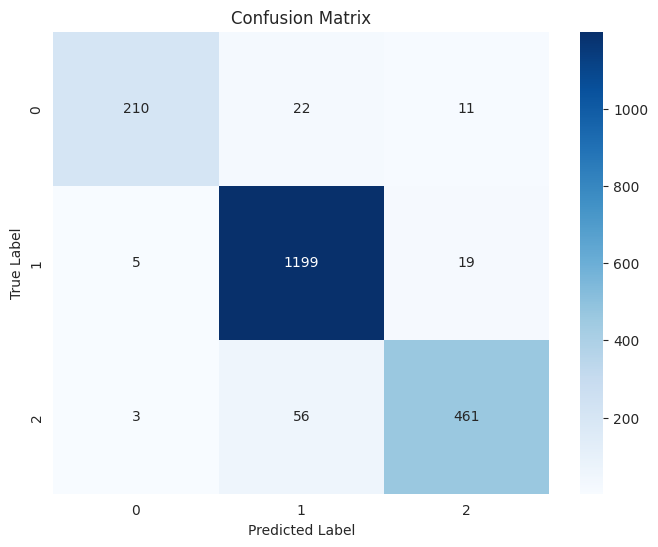

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
joblib.dump(gbc, 'final_gradient_boosting_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [23]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable
